********************************************************************************
ИМЯ И ПУТЬ К ФАЙЛУ:  C:/Users/dufry/OneDrive/JOB/De/_LEARN/Python/_Jupyter Notebook/CPUR_TEST/DOCs/02-02.docx
--------------------------------------------------------------------------------
Количество абзацев в документе=4
--------------------------------------------------------------------------------
Количество таблиц в документе=2
--------------------------------------------------------------------------------
Текст 0го + 1го абзаца в документе: 2.2. СРЕДНЕГОДОВАЯ ЧИСЛЕННОСТЬ НАСЕЛЕНИЯ(оценка; тысяч человек)
********************************************************************************


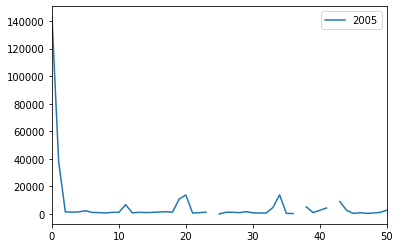

        2005
0   143518.8
1    38076.5
2     1511.7
3     1335.9
4     1492.0
5     2362.9
6     1109.3
7     1025.5
8      705.9
9     1186.7
10    1196.2
11    6760.3
12     828.6
13    1194.1
14    1028.9
15    1144.7
16    1423.9
17    1623.5
18    1321.3
19   10825.1
20   13754.9
21     682.8
22     972.9
23    1290.5
24       NaN
25      41.9
26    1248.6
27    1240.4
28     939.3
29    1683.4
30     848.2
31     670.1
32     727.6
33    4699.7
34   13853.9
35     442.1
36     293.3
37       NaN
38    5123.1
39    1004.5
40    2648.3
41    4342.6
42       NaN
43    9015.7
44    2672.7
45     425.6
46     871.7
47     452.3
48     706.6
49    1142.8
50    2744.0


In [2]:
import pandas as pd # Анализ данных
import numpy as np # Анализ данных, многомерные массивы
import matplotlib.pyplot as plt # Визуальный анализ данных

from tkinter import *  # Работа с GUI
from tkinter import filedialog as fd  # Диалоговые окна файлов
from tkinter import messagebox as mb  # Диалоговые окна
from tkinter.ttk import Progressbar # Индикатор прогресса
from tkinter import scrolledtext # Текстовая область со скроллом
import docx  # Работа с docx-файлами
import sys  # Высокоуровневое взаимодействие с операционной системой

# Выбор (имени) файла
def file_choose():
    # имя файла, ссылка на объект с файлом
    global file_name, doc
    # "сырые" данные: список имен абзацев, массив данных таблиц
    global raw_tables_names, raw_tables_data
    # длина разделителя, заглавный разделитель, основной разделитель
    global repite, sepmain, sep
    
    raw_tables_names, raw_tables_data = list(), list()
    repite, sepmain, sep = int(80), str('*'), str('-')
    
    ## Бесконечный цикл выбора и попытки открытия файла, пока не получится
    while True:
        try:
            file_name = fd.askopenfilename(filetypes=(("Файлы Word", "*.docx"), ("Все файлы", "*.*")),
                                           title="Выберите файл для анализа")
            doc = docx.Document(file_name)
            break
        except:
            mb.showinfo("Внимание", "Не удалось прочитать файл!")    
    
    raw_paragraphs()
    raw_tables()
    panda_tables()
    open_finished()
    return file_name

# Чтение "сырого" списка абзацев
def raw_paragraphs():
    for counter, value in enumerate(doc.paragraphs):        
        raw_tables_names.append(doc.paragraphs[counter].text)

# Чтение "сырых" данных таблиц
def raw_tables():
    # Создание структуры многомерного массива для "сырых" данных
    # Progressbar
    barmax = len(doc.tables) * 2
    barn = int()
    
    bar = Progressbar(window, maximum=barmax, length=1200)
    bar.grid(column=0, row=0)
    window.update()
    
    d1 = []
    for table in range(len(doc.tables)):
        tabl = doc.tables[table]
        d2 = []
        for row in range(len(tabl.rows)):
            roww = tabl.rows[row]
            d3 = ['' for cell in roww.cells]
            d2.append(d3)
        d1.append(d2)
        barn = barn + 1
        bar['value'] = barn
        window.update() 
    raw_tables_data.extend(d1)
        
    for table in range(len(doc.tables)):
        tabl = doc.tables[table]
        for row in range(len(tabl.rows)):
            roww = tabl.rows[row]
            for count_cell, cell in enumerate(roww.cells):
                raw_tables_data[table][row][count_cell] = ''.join([x.replace(',', '.') for x in cell.text])
        barn = barn + 1
        bar['value'] = barn
        window.update()

# Заполнение датасета панды
def panda_tables():
    global df
    df = pd.DataFrame(raw_tables_data[0][1:][:], columns = raw_tables_data[0][0])
    df = df.sort_index()

# Отображение результата открытия сырого файла
def open_finished():
    txt = scrolledtext.ScrolledText(window)
    txt.grid(column=0, row=1)  
    txt.delete
      
    print(sepmain * repite)
    print("ИМЯ И ПУТЬ К ФАЙЛУ: ", file_name)
    txt.insert(INSERT, sepmain * repite  + '\n')
    txt.insert(INSERT, "ИМЯ И ПУТЬ К ФАЙЛУ: " + file_name + '\n')

    print(sep * repite)
    paragraphs_num = len(doc.paragraphs)
    print("Количество абзацев в документе=%i" % paragraphs_num)
    txt.insert(INSERT, sepmain * repite + '\n')
    txt.insert(INSERT, "Количество абзацев в документе=" + str(paragraphs_num) + '\n')
    
    print(sep * repite)
    tables_num = len(doc.tables)
    print("Количество таблиц в документе=%i" % tables_num)
    txt.insert(INSERT, sepmain * repite + '\n')
    txt.insert(INSERT, "Количество таблиц в документе=" + str(tables_num) + '\n')
    
    print(sep * repite)
    header_text = str(doc.paragraphs[0].text) + str(doc.paragraphs[1].text)
    print("Текст 0го + 1го абзаца в документе:", header_text)
    txt.insert(INSERT, sepmain * repite + '\n')
    txt.insert(INSERT, "Текст 0го + 1го абзаца в документе:" + str(header_text) + '\n')
    
    window.update()
    
# Команда "Плоское содержание сырых абзацев"    
def print_raw_paragraphs_flat():
    print(sepmain * repite)
    print(raw_tables_names)
    
    txt = scrolledtext.ScrolledText(window)
    txt.grid(column=0, row=1)  
    txt.delete
    txt.insert(INSERT, raw_tables_names)
    
    window.update()
    
# Команда "Плоское содержание сырых таблиц"    
def print_raw_tables_flat():
    print(sepmain * repite)
    print(raw_tables_data)
    
    txt = scrolledtext.ScrolledText(window)
    txt.grid(column=0, row=1)  
    txt.delete
    txt.insert(INSERT, raw_tables_data)
    
    window.update()
    
# Команда "Содержание сырых абзацев"    
def print_paragraphs_flat():
    txt = scrolledtext.ScrolledText(window)
    txt.grid(column=0, row=1)  
    txt.delete
    
    print(sepmain * repite)
    for counter in range(len(raw_tables_names)):
        print(f"{counter}: {raw_tables_names[counter]}")
        txt.insert(INSERT, str(counter) + ":" + str(raw_tables_names[counter]) + '\n')
    window.update()
    
# Команда "Содержание сырых таблиц"    
def print_tables_flat():
    txt = scrolledtext.ScrolledText(window)
    txt.grid(column=0, row=1)  
    txt.delete
    
    print(sepmain * repite)
    for table in range(len(doc.tables)):
        tabl = doc.tables[table]
        for row in range(len(tabl.rows)):
            print(f'{table}-{row}:{raw_tables_data[table][row]}')
            txt.insert(INSERT, str(table) + "-" + str(row) + ":" + str(raw_tables_data[table][row]) + '\n')
    window.update()

# Команда "Последний параграф сырого"    
def print_raw_paragraphs_last():
    txt = scrolledtext.ScrolledText(window)
    txt.grid(column=0, row=1)  
    txt.delete
    
    print(sepmain * repite)
    txt.insert(INSERT, sepmain * repite + '\n')
    print(f'Параграф {len(doc.paragraphs) - 1}: "{doc.paragraphs[len(doc.paragraphs) - 1].text}"')
    txt.insert(INSERT, "Параграф " + str(len(doc.paragraphs) - 1) + ": "
               + str(doc.paragraphs[len(doc.paragraphs) - 1].text) + '\n')
    print(sep * repite)
    txt.insert(INSERT, sepmain * repite + '\n')
    print(f'Параграф {len(doc.paragraphs) - 2}: "{doc.paragraphs[len(doc.paragraphs) - 2].text}"')    
    txt.insert(INSERT, "Параграф " + str(len(doc.paragraphs) - 2) + ": " 
               + str(doc.paragraphs[len(doc.paragraphs) - 2].text) + '\n')
    window.update()
               
# Команда "Последний элемент таблицы сырого"    
def print_raw_tables_last():
    txt = scrolledtext.ScrolledText(window)
    txt.grid(column=0, row=1)  
    txt.delete
    
    print(sepmain * repite)
    txt.insert(INSERT, sepmain * repite + '\n')
    x = len(doc.tables) - 1
    tabl = doc.tables[x]
    y = len(tabl.rows) - 1
    roww = tabl.rows[y]
    z = len(roww.cells) - 1
    print(f'Элемент{[x]}{[y]}{[z]}:"{raw_tables_data[x][y][z]}"')
    print(f'Параграф {len(doc.paragraphs) - 2}: "{doc.paragraphs[len(doc.paragraphs) - 2].text}"')    
    txt.insert(INSERT, "Элемент " + str(x) + "-" + str(y) + "-" + str(z) + ":" 
               + str(raw_tables_data[x][y][z]) + '\n')
    print(sep * repite)
    txt.insert(INSERT, sepmain * repite + '\n')
    print(f'Элемент{[x]}{[y]}{[z-1]}:"{raw_tables_data[x][y][z-1]}"')
    txt.insert(INSERT, "Элемент " + str(x) + "-" + str(y) + "-" + str(z-1) + ":" 
               + str(raw_tables_data[x][y][z-1]) + '\n')

# Команда "Датасет Панды"    
def print_panda_tables():
    print(df)
    txt = scrolledtext.ScrolledText(window)
    txt.grid(column=0, row=1)  
    txt.delete
    txt.insert(INSERT, df)
    window.update()
    
# Команда "Срез датасета Панды"    
def print_panda_tables_slice():
    print(sepmain * repite)
    new_sample_df = df.loc[ : , ['2005']]
    new_sample_df['2005'] = pd.to_numeric(new_sample_df['2005'], errors='coerce')
    new_sample_df.plot()
    plt.show()
    
    print(new_sample_df)
    txt = scrolledtext.ScrolledText(window)
    txt.grid(column=0, row=1)  
    txt.delete
    txt.insert(INSERT, new_sample_df)
    window.update()
        
# Команда "Выход"
def exit():
    exit()

# Команда "О программе"
def about():
    mb.showinfo("Информация", "Тестовое задание №1 для ЦПУР\nАвтор: Малышев Денис \nДата: 11.09.2020")

# Создание основного окна
window = Tk()
window.title("CPUR_TEST1")
mainmenu = Menu(window)
window.config(menu=mainmenu)
window.geometry('1200x500')

# Меню
filemenu = Menu(mainmenu, tearoff=0)
filemenu.add_command(label="Открыть...", command=file_choose)
filemenu.add_command(label="Выход", command=exit)

datamenu = Menu(mainmenu, tearoff=0)
datamenu.add_command(label="???", command=file_choose)
datamenu.add_command(label="???", command=exit)

printmenu = Menu(mainmenu, tearoff=0)
printmenu.add_command(label="Результат открытия файла", command=open_finished)
printmenu.add_separator()
printmenu.add_command(label="Плоское содержание сырых абзацев", command=print_raw_paragraphs_flat)
printmenu.add_command(label="Плоское содержание сырых таблиц", command=print_raw_tables_flat)
printmenu.add_command(label="Cодержание сырых абзацев", command=print_paragraphs_flat)
printmenu.add_command(label="Cодержание сырых таблиц", command=print_tables_flat)
printmenu.add_separator()
printmenu.add_command(label="Последний параграф сырого", command=print_raw_paragraphs_last)
printmenu.add_command(label="Последний элемент таблицы сырого", command=print_raw_tables_last)
printmenu.add_separator()
printmenu.add_command(label="Датасет Панды", command=print_panda_tables)
printmenu.add_command(label="Срез датасета Панды", command=print_panda_tables_slice)

helpmenu = Menu(mainmenu, tearoff=0)
helpmenu.add_command(label="О программе", command=about)

mainmenu.add_cascade(label="Файл", menu=filemenu)
mainmenu.add_cascade(label="Очистка данных", menu=datamenu)
mainmenu.add_cascade(label="Отображение", menu=printmenu)
mainmenu.add_cascade(label="Справка", menu=helpmenu)

# Вывод интерфейса
Tk.iconbitmap(window, default='logo.ico')
file_choose() 
window.mainloop()

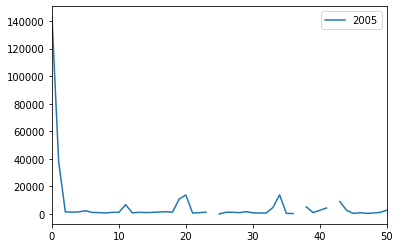

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

new_sample_df = df.loc[ : , ['2005']]
new_sample_df['2005'] = pd.to_numeric(new_sample_df['2005'], errors='coerce')
new_sample_df

new_sample_df.plot()
plt.show()

In [27]:
import csv

dates = ['2020-01-01', '2020-01-02', '2020-01-03']
urls = ['www.abc.com', 'www.cnn.com', 'www.nbc.com']

csv_file_patch = 'filename.csv'

with open(csv_file_patch, 'w') as fout:
    csv_file = csv.writer(fout, delimiter=';', lineterminator='\n')
    result_array = zip(dates, urls, urls)
    csv_file.writerows(result_array)